In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = len(tmpA)-1

# ## t-test
# print(scipy.stats.ttest_ind(tmpB,tmpA))
# de = np.mean(tmpA)-np.mean(tmpB)
# nu = np.sqrt(np.var(tmpA)/df+np.var(tmpB)/df)
# print(de/nu)
# ## paired t-test
# print(scipy.stats.ttest_rel(tmpB,tmpA))
# diff = [a-b for a,b in zip(tmpA,tmpB)]
# de = np.mean(diff)
# nu = np.std(diff)/np.sqrt(df)
# print(de/nu)

A: mu = -0.04, sd = 4.40
B: mu = 2.06, sd = 5.11
t = -2.10/0.96 = -2.18

A: mu = 0.44, sd = 4.65
B: mu = 1.80, sd = 3.96
t = -1.36/0.87 = -1.56

A: mu = 0.32, sd = 5.21
B: mu = 0.66, sd = 5.72
t = -0.34/1.11 = -0.31

A: mu = -0.44, sd = 6.27
B: mu = 2.71, sd = 5.06
t = -3.14/1.15 = -2.73

A: mu = 0.83, sd = 4.74
B: mu = 1.28, sd = 5.15
t = -0.45/1.00 = -0.45



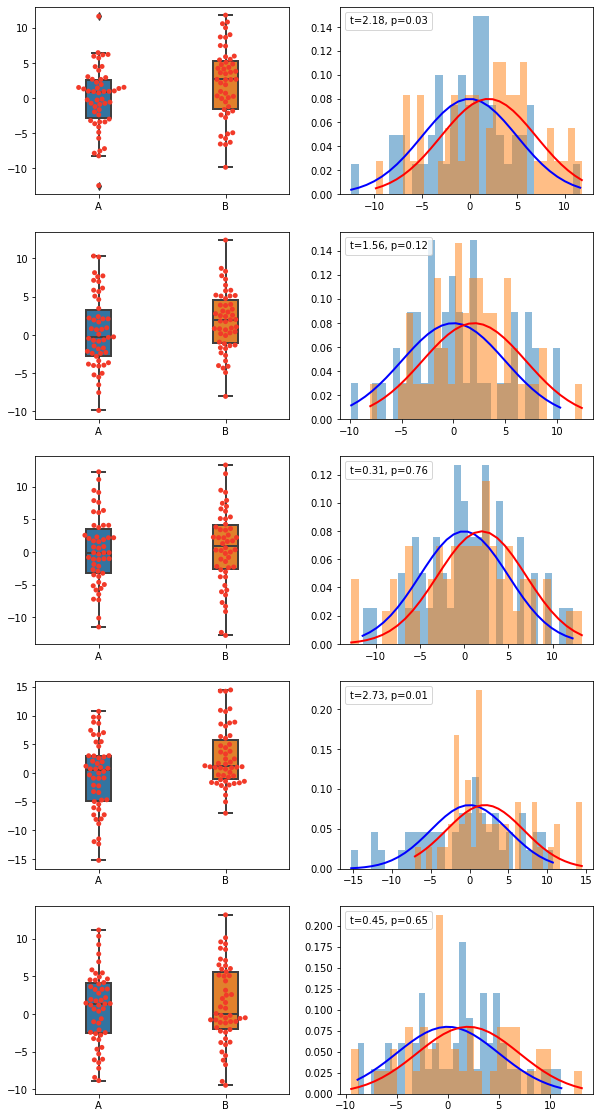

In [95]:
## population
mu_A, sd_A = 0, 5
mu_B, sd_B = 2, 5
n = 50

fig, axs = plt.subplots(nrows=5,ncols=2,figsize=(10,20))
for i in range(nrow):
    ## np.random.nomral 함수를 이용해서 평균 mu, 표준편차 sd 인 sample들을 n 개 추출한다.
    tmpA = np.random.normal(loc=mu_A, scale=sd_B, size=n)
    tmpB = np.random.normal(loc=mu_B, scale=sd_B, size=n)
    print("A: mu = %.2f, sd = %.2f"%(np.mean(tmpA),np.std(tmpA)))
    print("B: mu = %.2f, sd = %.2f"%(np.mean(tmpB),np.std(tmpB)))
    ## t-test
    df = n-1
    tval, pval = scipy.stats.ttest_ind(tmpB,tmpA)
    de = np.mean(tmpA)-np.mean(tmpB)
    nu = np.sqrt(np.var(tmpA)/df+np.var(tmpB)/df)
    print("t = %.2f/%.2f = %.2f\n"%(de,nu,de/nu))

    df = pd.DataFrame({'A':tmpA, 'B':tmpB})
    sns.swarmplot(data=df, size=5, color='#F23A29', ax=axs[i,0])
    sns.boxplot(data=df, linewidth=2, width=.2, ax=axs[i,0])

    ## sample들의 historgram을 출력한다.
    count, bins_A, _ = axs[i,1].hist(tmpA, bins=30, alpha=0.5, histtype='bar', density=True)
    count, bins_B, _ = axs[i,1].hist(tmpB, bins=30, alpha=0.5, histtype='bar', density=True)
    # sample들을 이용해서 Gaussian Distribution의 shape을 재구축해서 line으로 그린다.
#     bins = np.array(sorted(np.concatenate([bins_A,bins_B])))
    axs[i,1].plot(bins_A, 1/(sd_A * np.sqrt(2 * np.pi)) * np.exp( - (bins_A - mu_A)**2 / (2 * sd_A**2) ), linewidth=2, color='b')
    axs[i,1].plot(bins_B, 1/(sd_B * np.sqrt(2 * np.pi)) * np.exp( - (bins_B - mu_B)**2 / (2 * sd_B**2) ), linewidth=2, color='r')
    axs[i,1].legend(loc='upper left', labels=['t=%.2f, p=%.2f'%(tval,pval)], handletextpad=0.1, handlelength=0.)
    